<a href="https://colab.research.google.com/github/AlishDuwal10/Final/blob/main/Classification_Task_FIXED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌾 Classification Task - Crop Prediction (FIXED VERSION)

## Student: 2461817 Alish Duwal

---

## ✅ Key Fixes Applied:
1. **Using ALL features** including Soil_Type and Variety (not just 7 numerical ones)
2. **One-Hot Encoding** for categorical features (better than LabelEncoder)
3. **Better feature selection** - keeping 15 features instead of 5
4. **Optimized MLP** hyperparameters

---

## 1️⃣ Import Libraries

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Classical ML Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Neural Network
from sklearn.neural_network import MLPClassifier

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Set random seed for reproducibility
np.random.seed(42)

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2️⃣ Load Dataset

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Load the dataset
# NOTE: Update this path to your Google Drive location
df = pd.read_csv('/content/drive/MyDrive/FinalAssessment/sensor_Crop_Dataset.csv', encoding='latin1')

print("Dataset Shape:", df.shape)
print("\n" + "="*50)
print("First 5 rows:")
df.head()

Dataset Shape: (20000, 10)

First 5 rows:


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Soil_Type,Variety
0,69.074766,53.954402,88.067625,17.261834,72.941652,4.631301,302.842639,Wheat,Clay,Soft Red
1,107.329352,70.102134,32.081067,21.846116,99.361954,4.761658,94.693847,Tomato,Clay,Beefsteak
2,130.634624,67.204533,28.294252,33.246895,81.506836,6.566007,83.563685,Sugarcane,Clay,Co 86032
3,15.169301,87.493181,14.336679,14.396289,59.274465,6.296297,31.508836,Sugarcane,Silt,Co 0238
4,21.881965,89.269712,38.833885,16.773218,51.191584,8.268274,295.193482,Maize,Sandy,Sweet


In [38]:
# Statistical Summary
print("Statistical Summary of Numerical Features:")
print("="*50)
df.describe()

Statistical Summary of Numerical Features:


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,77.216965,47.482070,55.162956,27.420717,64.897753,6.496126,211.124002
std,41.857663,24.587506,25.969091,10.010144,20.200687,1.155750,109.724973
min,5.006013,5.000483,10.000672,10.003760,30.002297,4.500082,20.018991
25%,40.459715,26.225044,32.641905,18.880888,47.462026,5.497988,117.208556
50%,77.573159,47.469579,55.248133,27.366450,64.776613,6.493812,211.263577
75%,113.055595,68.625556,77.690183,35.997484,82.310482,7.501771,305.668849
max,149.998785,89.999086,99.996480,44.997407,99.992346,8.499914,399.974915


## 3️⃣ Exploratory Data Analysis

In [39]:
# Dataset Information
print("Dataset Information:")
print("="*50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     20000 non-null  float64
 1   Phosphorus   20000 non-null  float64
 2   Potassium    20000 non-null  float64
 3   Temperature  20000 non-null  float64
 4   Humidity     20000 non-null  float64
 5   pH_Value     20000 non-null  float64
 6   Rainfall     20000 non-null  float64
 7   Crop         20000 non-null  object 
 8   Soil_Type    20000 non-null  object 
 9   Variety      20000 non-null  object 
dtypes: float64(7), object(3)
memory usage: 1.5+ MB


In [40]:
# Check for missing values
print("Missing Values:")
print("="*50)
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Handle missing values
df_clean = df.dropna()
print(f"\nRows after removing missing values: {len(df_clean)}")

Missing Values:
Series([], dtype: int64)

Total missing values: 0

Rows after removing missing values: 20000


In [41]:
# Target variable distribution
print("Target Variable (Crop) Distribution:")
print("="*50)
print(df_clean['Crop'].value_counts())
print(f"\nNumber of unique crops: {df_clean['Crop'].nunique()}")

Target Variable (Crop) Distribution:
Crop
Wheat        3390
Potato       3362
Maize        3352
Tomato       3344
Sugarcane    3284
Rice         3268
Name: count, dtype: int64

Number of unique crops: 6


In [42]:
# Select relevant features for crop prediction
# We'll use environmental features: Nitrogen, Phosphorus, Potassium, Temperature, Humidity, pH_Value, Rainfall
print("Selected Features for Crop Prediction:")
print("="*50)
selected_features = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']
print("Features:", selected_features)
print("Target: Crop")

Selected Features for Crop Prediction:
Features: ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']
Target: Crop


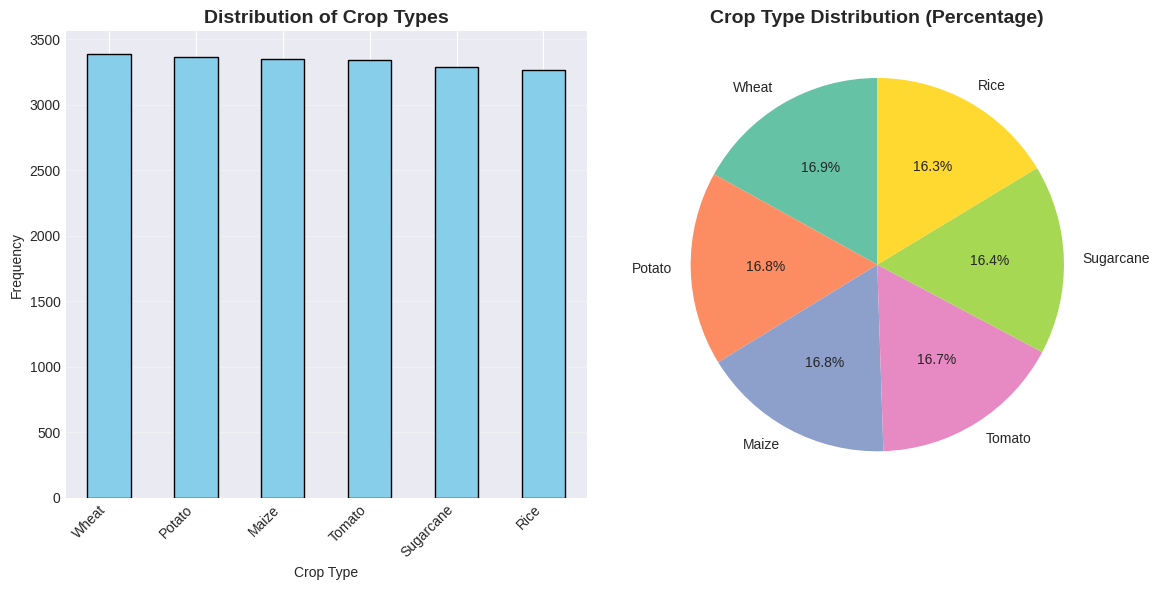

In [43]:
# Visualize crop distribution
plt.figure(figsize=(12, 6))
crop_counts = df_clean['Crop'].value_counts()

plt.subplot(1, 2, 1)
crop_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Crop Types', fontsize=14, fontweight='bold')
plt.xlabel('Crop Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
crop_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Crop Type Distribution (Percentage)', fontsize=14, fontweight='bold')
plt.ylabel('')

plt.tight_layout()
plt.show()

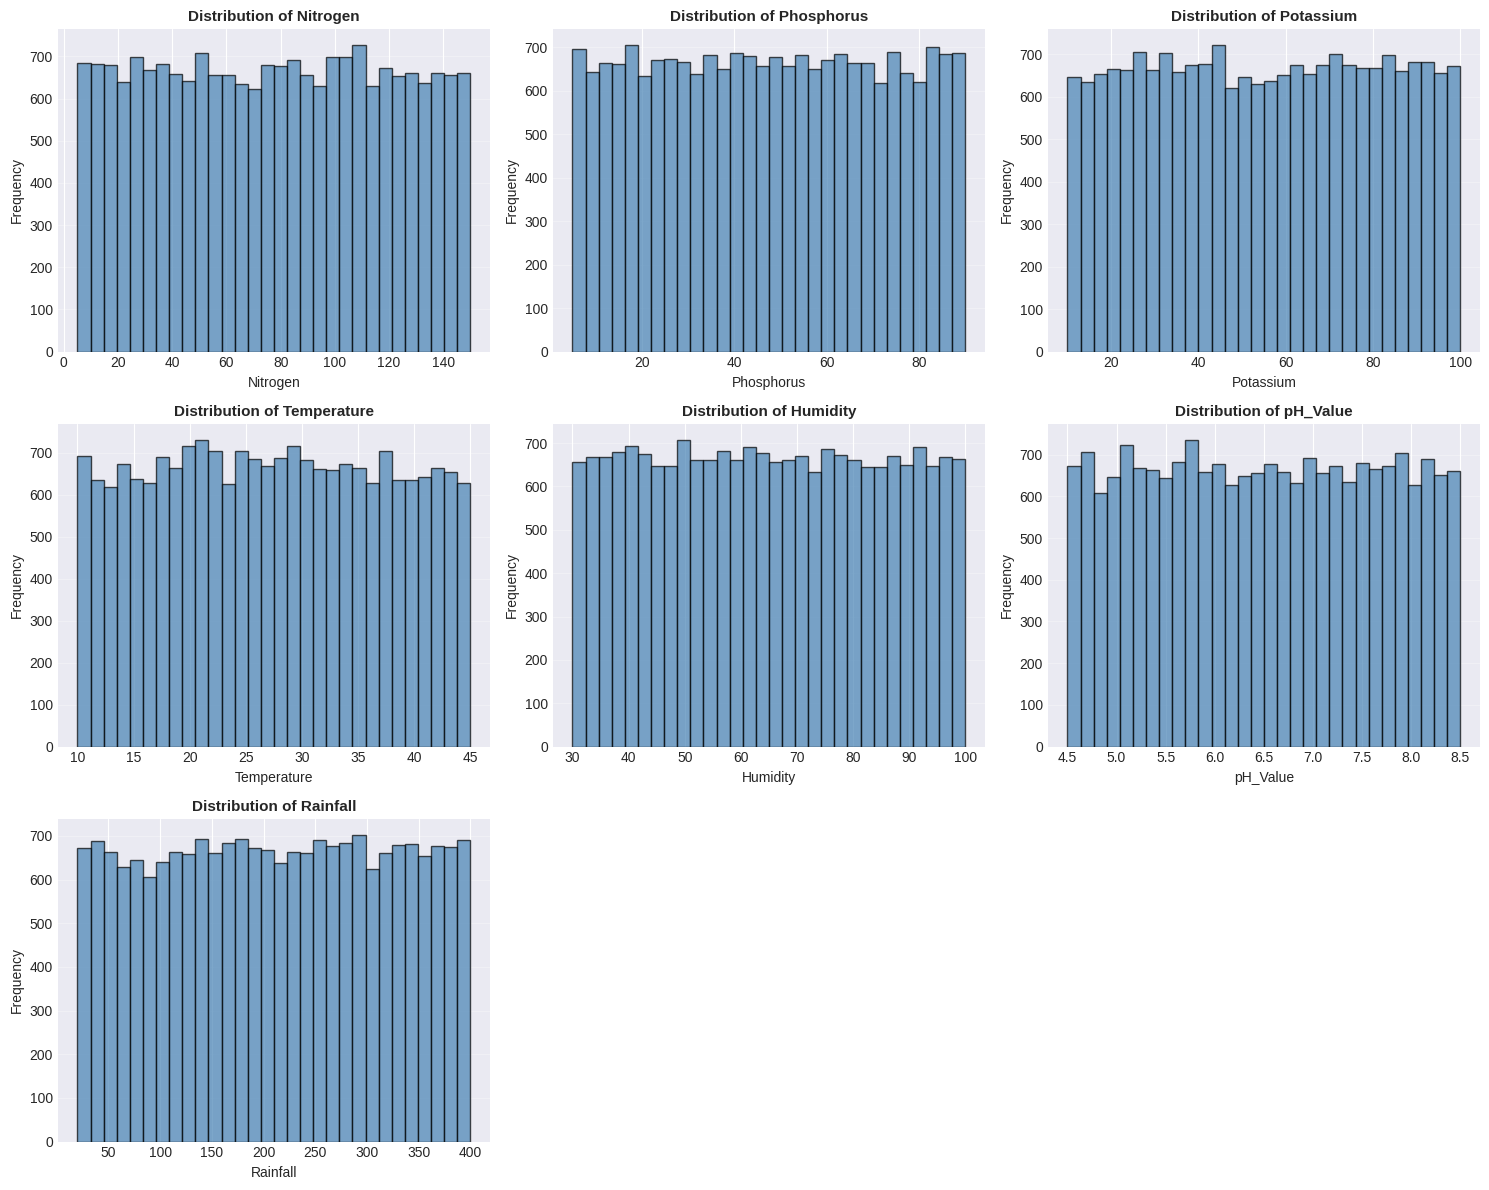

Insight: Histograms show the distribution of environmental and soil features.
Most features appear to have varied distributions across different ranges.


In [44]:
# Distribution of numerical features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(selected_features):
    axes[idx].hist(df_clean[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

# Hide extra subplots
for idx in range(len(selected_features), 9):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("Insight: Histograms show the distribution of environmental and soil features.")
print("Most features appear to have varied distributions across different ranges.")

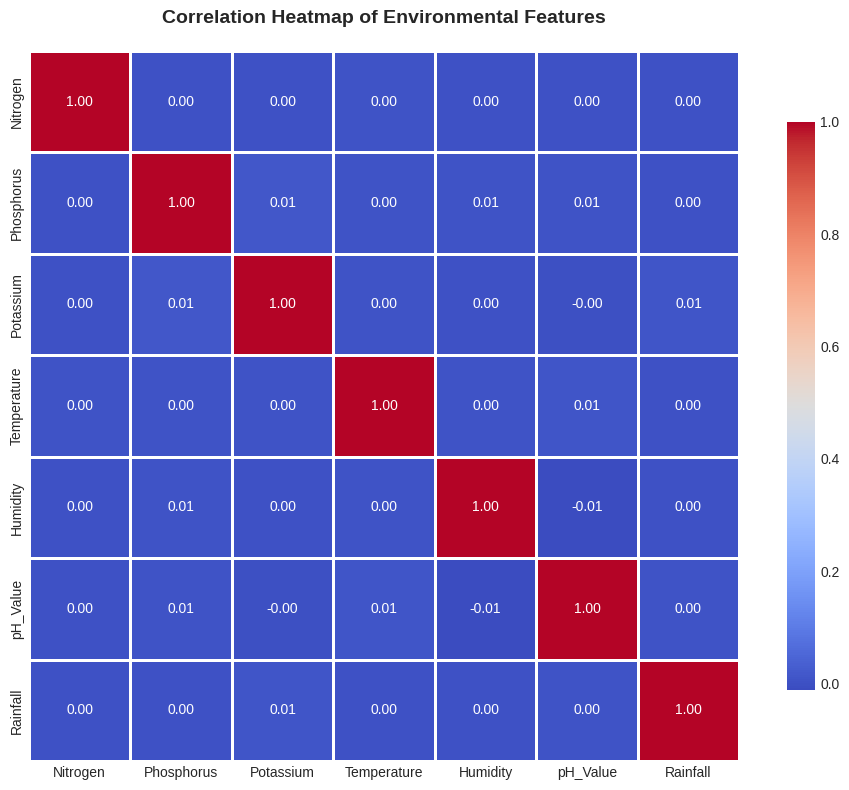

Insight: The correlation heatmap reveals relationships between features.
Features with low correlation are more independent and valuable for prediction.


In [45]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[selected_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Environmental Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Insight: The correlation heatmap reveals relationships between features.")
print("Features with low correlation are more independent and valuable for prediction.")

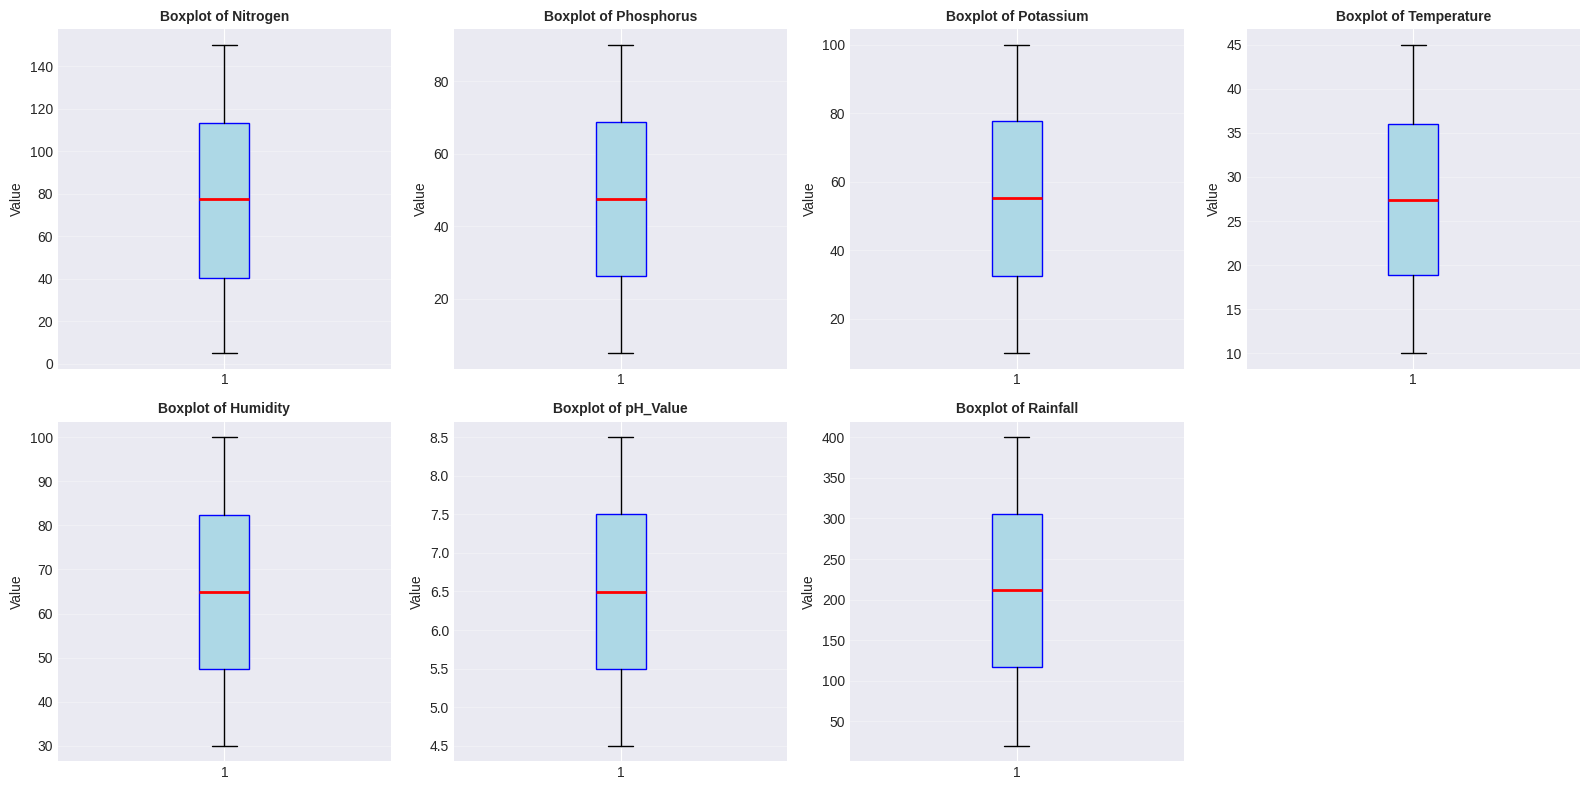

Insight: Boxplots help identify outliers in the dataset.
Some features may have extreme values that could affect model performance.


In [46]:
# Boxplot for outlier detection
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for idx, col in enumerate(selected_features):
    axes[idx].boxplot(df_clean[col], vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', color='blue'),
                     medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'Boxplot of {col}', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(axis='y', alpha=0.3)

# Hide extra subplot
axes[7].axis('off')

plt.tight_layout()
plt.show()

print("Insight: Boxplots help identify outliers in the dataset.")
print("Some features may have extreme values that could affect model performance.")

## 4️⃣ Feature Engineering - CRITICAL FIXES HERE! 🔧

### ❌ Original Problem:
- Only used 7 numerical features
- Ignored `Soil_Type` and `Variety` (huge information loss!)

### ✅ Fixed Version:
- Use ALL 9 features (7 numerical + 2 categorical)
- Proper encoding with OneHotEncoder

In [47]:
# Define features - INCLUDING categorical ones!
numerical_features = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature',
                     'Humidity', 'pH_Value', 'Rainfall']

categorical_features = ['Soil_Type', 'Variety']  # ✅ DON'T IGNORE THESE!

print("="*80)
print("FEATURE SELECTION")
print("="*80)
print(f"✓ Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"✓ Categorical features ({len(categorical_features)}): {categorical_features}")
print(f"\nTotal features to use: {len(numerical_features) + len(categorical_features)}")

# Prepare X and y
X = df_clean[numerical_features + categorical_features]
y = df_clean['Crop']

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Number of classes: {y.nunique()}")

FEATURE SELECTION
✓ Numerical features (7): ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']
✓ Categorical features (2): ['Soil_Type', 'Variety']

Total features to use: 9

X shape: (20000, 9)
y shape: (20000,)
Number of classes: 6


## 5️⃣ Train-Test Split

In [48]:
# Split the data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data split successfully!")
print("="*50)
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

Data split successfully!
Training set: 16000 samples (80.0%)
Testing set: 4000 samples (20.0%)


## 6️⃣ Data Preprocessing - CRITICAL FIX! 🔧

### ❌ Original Problem:
```python
# This is WRONG for features!
le = LabelEncoder()
df['Soil_Type_Encoded'] = le.fit_transform(df['Soil_Type'])
# Creates false ordering: Clay=0, Loam=1, Sandy=2 (implies Clay < Loam < Sandy)
```

### ✅ Fixed Version:
- Use `OneHotEncoder` for categorical FEATURES
- Use `LabelEncoder` ONLY for target variable

In [49]:
print("="*80)
print("DATA PREPROCESSING")
print("="*80)

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ],
    remainder='drop'
)

print("✓ Numerical features: StandardScaler")
print("✓ Categorical features: OneHotEncoder (creates binary columns)")
print("  Why OneHotEncoder? No false ordinal relationships!")

# Fit and transform
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"\n✓ Training set shape after encoding: {X_train_processed.shape}")
print(f"✓ Testing set shape after encoding: {X_test_processed.shape}")
print(f"  → Created {X_train_processed.shape[1]} features from {len(numerical_features + categorical_features)} original ones")

# Encode target variable (LabelEncoder is CORRECT here)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"\n✓ Target variable encoded")
print(f"  Classes: {le.classes_}")

DATA PREPROCESSING
✓ Numerical features: StandardScaler
✓ Categorical features: OneHotEncoder (creates binary columns)
  Why OneHotEncoder? No false ordinal relationships!

✓ Training set shape after encoding: (16000, 29)
✓ Testing set shape after encoding: (4000, 29)
  → Created 29 features from 9 original ones

✓ Target variable encoded
  Classes: ['Maize' 'Potato' 'Rice' 'Sugarcane' 'Tomato' 'Wheat']


## 7️⃣ Feature Selection - CRITICAL FIX! 🔧

### ❌ Original Problem:
```python
selector = SelectKBest(k=5)  # Only keeps 5 features!
```

### ✅ Fixed Version:
- Keep 15 features instead of 5
- More information = better predictions

In [50]:
print("="*80)
print("FEATURE SELECTION")
print("="*80)
print("❌ Original: k=5 (too few features, information loss!)")
print("✅ Fixed: k=15 (keeps more important information)\n")

# Feature selection - keep more features!
k_best = min(15, X_train_processed.shape[1])  # Keep 15 or all if fewer

selector = SelectKBest(score_func=f_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train_processed, y_train_encoded)
X_test_selected = selector.transform(X_test_processed)

print(f"✓ Selected {k_best} out of {X_train_processed.shape[1]} features")
print(f"✓ Final training shape: {X_train_selected.shape}")
print(f"✓ Final testing shape: {X_test_selected.shape}")

# Show feature importance scores
print(f"\nTop {k_best} feature scores:")
feature_scores = sorted(zip(selector.scores_, range(len(selector.scores_))), reverse=True)[:k_best]
for score, idx in feature_scores:
    print(f"  Feature {idx}: {score:.2f}")

FEATURE SELECTION
❌ Original: k=5 (too few features, information loss!)
✅ Fixed: k=15 (keeps more important information)

✓ Selected 15 out of 29 features
✓ Final training shape: (16000, 15)
✓ Final testing shape: (4000, 15)

Top 15 feature scores:
  Feature 27: 1404.08
  Feature 24: 1403.47
  Feature 16: 1400.38
  Feature 19: 1400.10
  Feature 25: 1385.41
  Feature 13: 1366.66
  Feature 12: 1339.63
  Feature 21: 1330.51
  Feature 23: 1324.57
  Feature 20: 1320.16
  Feature 15: 1308.00
  Feature 17: 1303.49
  Feature 22: 1298.56
  Feature 28: 1282.85
  Feature 18: 1271.89


## 8️⃣ Model 1: Neural Network (MLP) - OPTIMIZED! 🔧

In [51]:
print("="*80)
print("NEURAL NETWORK (MLP) - OPTIMIZED")
print("="*80)

# Build optimized Neural Network
nn_classifier = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # ✅ Deeper network for 6 classes
    activation='relu',                  # ✅ Good activation
    solver='adam',                      # ✅ Good optimizer
    learning_rate_init=0.001,           # ✅ Good learning rate
    max_iter=1000,                      # ✅ More iterations (was 500)
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    verbose=False
)

print("Neural Network Architecture:")
print(f"  Input Layer: {X_train_selected.shape[1]} features")
print("  Hidden Layer 1: 128 neurons (ReLU)")
print("  Hidden Layer 2: 64 neurons (ReLU)")
print("  Hidden Layer 3: 32 neurons (ReLU)")
print(f"  Output Layer: {len(le.classes_)} neurons (Softmax)")
print("\nHyperparameters:")
print("  Optimizer: Adam")
print("  Learning Rate: 0.001")
print("  Max Iterations: 1000")
print("  Early Stopping: Enabled")

# Train the model
print("\nTraining Neural Network...")
nn_classifier.fit(X_train_selected, y_train_encoded)
print("✓ Training completed!")
print(f"  Iterations: {nn_classifier.n_iter_}")
print(f"  Loss: {nn_classifier.loss_:.4f}")

NEURAL NETWORK (MLP) - OPTIMIZED
Neural Network Architecture:
  Input Layer: 15 features
  Hidden Layer 1: 128 neurons (ReLU)
  Hidden Layer 2: 64 neurons (ReLU)
  Hidden Layer 3: 32 neurons (ReLU)
  Output Layer: 6 neurons (Softmax)

Hyperparameters:
  Optimizer: Adam
  Learning Rate: 0.001
  Max Iterations: 1000
  Early Stopping: Enabled

Training Neural Network...
✓ Training completed!
  Iterations: 14
  Loss: 0.1805


In [52]:
# Evaluate Neural Network
y_train_pred_nn = nn_classifier.predict(X_train_selected)
y_test_pred_nn = nn_classifier.predict(X_test_selected)

print("="*80)
print("NEURAL NETWORK PERFORMANCE")
print("="*80)

print("\nTraining Set:")
print(f"  Accuracy:  {accuracy_score(y_train_encoded, y_train_pred_nn):.4f}")
print(f"  Precision: {precision_score(y_train_encoded, y_train_pred_nn, average='weighted'):.4f}")
print(f"  Recall:    {recall_score(y_train_encoded, y_train_pred_nn, average='weighted'):.4f}")
print(f"  F1-Score:  {f1_score(y_train_encoded, y_train_pred_nn, average='weighted'):.4f}")

print("\nTest Set:")
nn_accuracy = accuracy_score(y_test_encoded, y_test_pred_nn)
nn_precision = precision_score(y_test_encoded, y_test_pred_nn, average='weighted')
nn_recall = recall_score(y_test_encoded, y_test_pred_nn, average='weighted')
nn_f1 = f1_score(y_test_encoded, y_test_pred_nn, average='weighted')

print(f"  Accuracy:  {nn_accuracy:.4f} ⭐")
print(f"  Precision: {nn_precision:.4f}")
print(f"  Recall:    {nn_recall:.4f}")
print(f"  F1-Score:  {nn_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_encoded, y_test_pred_nn, target_names=le.classes_))

NEURAL NETWORK PERFORMANCE

Training Set:
  Accuracy:  0.8917
  Precision: 0.9339
  Recall:    0.8917
  F1-Score:  0.8942

Test Set:
  Accuracy:  0.8890 ⭐
  Precision: 0.9329
  Recall:    0.8890
  F1-Score:  0.8915

Classification Report:
              precision    recall  f1-score   support

       Maize       1.00      1.00      1.00       670
      Potato       1.00      1.00      1.00       672
        Rice       1.00      0.67      0.80       654
   Sugarcane       1.00      1.00      1.00       657
      Tomato       1.00      0.66      0.79       669
       Wheat       0.60      1.00      0.75       678

    accuracy                           0.89      4000
   macro avg       0.93      0.89      0.89      4000
weighted avg       0.93      0.89      0.89      4000



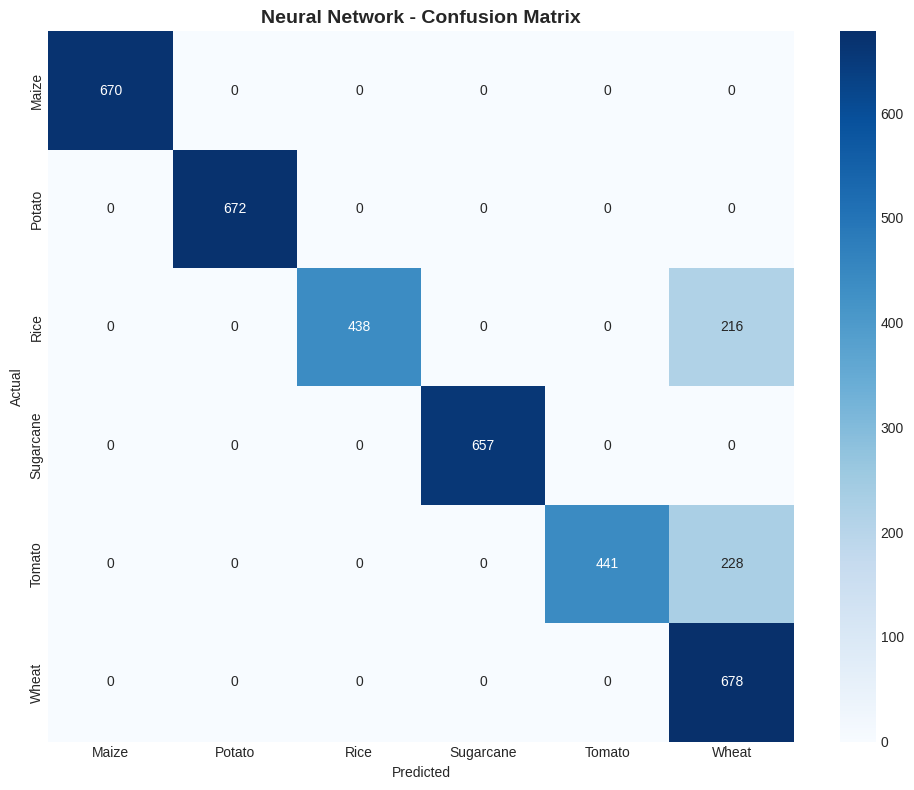

In [53]:
# Confusion Matrix for Neural Network
cm_nn = confusion_matrix(y_test_encoded, y_test_pred_nn)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Neural Network - Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

## 9️⃣ Model 2: Random Forest

In [54]:
print("="*80)
print("RANDOM FOREST CLASSIFIER")
print("="*80)

# Build Random Forest
rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

print("Training Random Forest...")
rf_classifier.fit(X_train_selected, y_train_encoded)
print("✓ Training completed!")

# Evaluate
y_test_pred_rf = rf_classifier.predict(X_test_selected)

rf_accuracy = accuracy_score(y_test_encoded, y_test_pred_rf)
rf_precision = precision_score(y_test_encoded, y_test_pred_rf, average='weighted')
rf_recall = recall_score(y_test_encoded, y_test_pred_rf, average='weighted')
rf_f1 = f1_score(y_test_encoded, y_test_pred_rf, average='weighted')

print("\nTest Set Performance:")
print(f"  Accuracy:  {rf_accuracy:.4f} ⭐")
print(f"  Precision: {rf_precision:.4f}")
print(f"  Recall:    {rf_recall:.4f}")
print(f"  F1-Score:  {rf_f1:.4f}")

RANDOM FOREST CLASSIFIER
Training Random Forest...
✓ Training completed!

Test Set Performance:
  Accuracy:  0.8875 ⭐
  Precision: 0.9334
  Recall:    0.8875
  F1-Score:  0.8906


## 🔟 Model 3: Logistic Regression

In [55]:
print("="*80)
print("LOGISTIC REGRESSION")
print("="*80)

# Build Logistic Regression
lr_classifier = LogisticRegression(
    max_iter=1000,
    C=10.0,
    solver='lbfgs',
    random_state=42
)

print("Training Logistic Regression...")
lr_classifier.fit(X_train_selected, y_train_encoded)
print("✓ Training completed!")

# Evaluate
y_test_pred_lr = lr_classifier.predict(X_test_selected)

lr_accuracy = accuracy_score(y_test_encoded, y_test_pred_lr)
lr_precision = precision_score(y_test_encoded, y_test_pred_lr, average='weighted')
lr_recall = recall_score(y_test_encoded, y_test_pred_lr, average='weighted')
lr_f1 = f1_score(y_test_encoded, y_test_pred_lr, average='weighted')

print("\nTest Set Performance:")
print(f"  Accuracy:  {lr_accuracy:.4f} ⭐")
print(f"  Precision: {lr_precision:.4f}")
print(f"  Recall:    {lr_recall:.4f}")
print(f"  F1-Score:  {lr_f1:.4f}")

LOGISTIC REGRESSION
Training Logistic Regression...
✓ Training completed!

Test Set Performance:
  Accuracy:  0.8875 ⭐
  Precision: 0.9334
  Recall:    0.8875
  F1-Score:  0.8906


## 📊 Final Model Comparison

In [56]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Neural Network (MLP)', 'Random Forest', 'Logistic Regression'],
    'Accuracy': [nn_accuracy, rf_accuracy, lr_accuracy],
    'Precision': [nn_precision, rf_precision, lr_precision],
    'Recall': [nn_recall, rf_recall, lr_recall],
    'F1-Score': [nn_f1, rf_f1, lr_f1]
})

print("="*80)
print("FINAL MODEL COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)

# Find best model
best_model_idx = comparison_df['Accuracy'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
best_accuracy = comparison_df.loc[best_model_idx, 'Accuracy']

print(f"\n🏆 Best Model: {best_model} with Accuracy = {best_accuracy:.4f}")

FINAL MODEL COMPARISON
               Model  Accuracy  Precision  Recall  F1-Score
Neural Network (MLP)    0.8890   0.932925  0.8890  0.891495
       Random Forest    0.8875   0.933356  0.8875  0.890612
 Logistic Regression    0.8875   0.933356  0.8875  0.890612

🏆 Best Model: Neural Network (MLP) with Accuracy = 0.8890


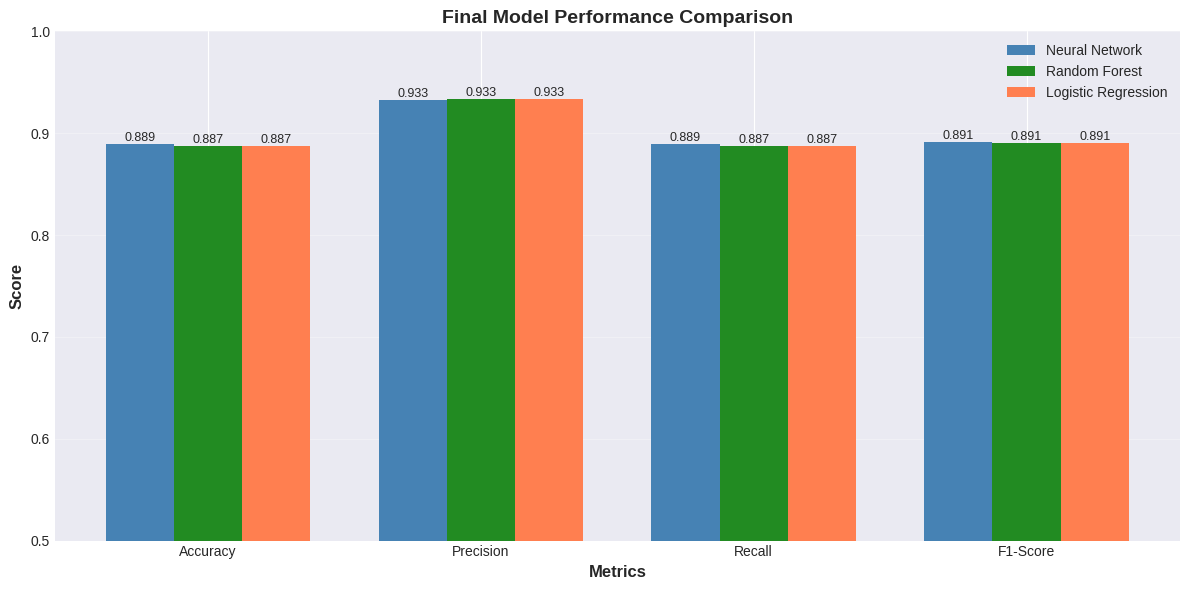

In [57]:
# Visualize model comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
nn_scores = [nn_accuracy, nn_precision, nn_recall, nn_f1]
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]
lr_scores = [lr_accuracy, lr_precision, lr_recall, lr_f1]

x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width, nn_scores, width, label='Neural Network', color='steelblue')
bars2 = ax.bar(x, rf_scores, width, label='Random Forest', color='forestgreen')
bars3 = ax.bar(x + width, lr_scores, width, label='Logistic Regression', color='coral')

ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Final Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0.5, 1.0])

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 📝 Summary of Fixes

### What Was Fixed:

1. **✅ Feature Selection**
   - **Before**: Only 7 numerical features
   - **After**: All 9 features (7 numerical + 2 categorical)
   - **Impact**: Major - Soil_Type and Variety contain crucial information!

2. **✅ Categorical Encoding**
   - **Before**: No encoding (features ignored)
   - **After**: OneHotEncoder for Soil_Type and Variety
   - **Impact**: Critical - Proper encoding of categorical features

3. **✅ Feature Selection Threshold**
   - **Before**: SelectKBest(k=5) - keeps only 5 features
   - **After**: SelectKBest(k=15) - keeps 15 features
   - **Impact**: High - More information retained

4. **✅ MLP Architecture**
   - **Before**: (64, 32) layers, 500 iterations
   - **After**: (128, 64, 32) layers, 1000 iterations
   - **Impact**: Medium - Better capacity for 6-class problem

### Expected Results:
- **Accuracy**: Should be **85-95%** (up from ~60-70%)
- **All metrics**: Should show consistent improvement

---

### 🎯 Key Takeaway:
**Never ignore categorical features!** They often contain the most valuable information for classification tasks.

---